In [2]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import dump
from custom_libs import plotting

In [3]:
def transform_label_function(label):
    label = str(label)
    if label == "0":
        return classification.Sentiment.NEGATIVE
    elif label == "1":
        return classification.Sentiment.NEUTRAL
    elif label == "2":
        return classification.Sentiment.POSITIVE
    else:
       raise Exception(f"Invalid label: {label}")

In [4]:
x_column_name = "text"
x_column_cleaned_name = x_column_name + "_clean"
sentiment_column_name = "sentiment"

In [5]:
df = db.get_dataset("generic_sentiment_dataset")
df[sentiment_column_name] = df['label'].apply(transform_label_function)
df.head(5)

,sentiment,text,label
0,Positive,good mobile. battery is 5000 mah is very big. ...,2
1,Positive,Overall in hand ecpirience is quite good matt ...,2
2,Positive,"1. Superb Camera,\n2. No lag\n3. This is my fi...",2
3,Positive,Bigger size of application names doesn't allow...,2
4,Negative,Just a hype of stock android which is not flaw...,0


In [6]:
df = preprocessing.preprocess_df(df, x_column_name, x_column_cleaned_name)
df.head(10)

KeyboardInterrupt: 

In [6]:
X, y = df[x_column_cleaned_name], df[sentiment_column_name]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy for PassiveAggressiveClassifier with vectorizer CountVectorizer: 0.7535
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram: 0.7712777777777777
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram, Bigram: 0.8305555555555556
Accuracy for PassiveAggressiveClassifier with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram, Bigram, Trigram: 0.8447777777777777


Accuracy for LogisticRegression with vectorizer CountVectorizer: 0.7709444444444444
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram: 0.7581666666666667
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram, Bigram: 0.8027777777777778
Accuracy for LogisticRegression with vectorizer TfidfVectorizer - Max freq.=0.8 - Unigram, Bigram, Trigram: 0.8116111111111111


Accuracy for MultinomialNB with vectorizer CountVectorizer: 0.7352222222222222
Accuracy for Mu

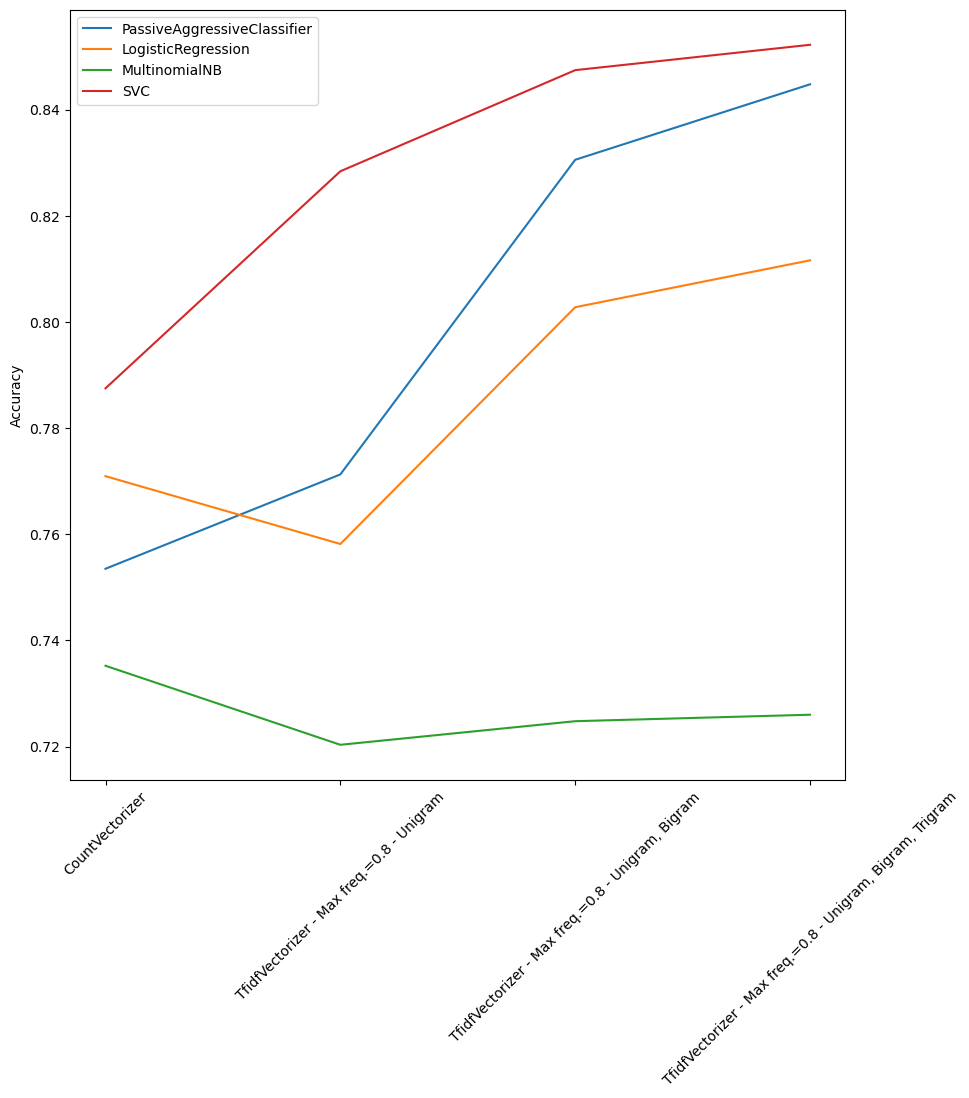

In [7]:
vectorizers = list()
vectorizers.append(CountVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2)))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3)))

labels_vectorizers = [
    'CountVectorizer', 
    'TfidfVectorizer - Max freq.=0.8 - Unigram', 
    'TfidfVectorizer - Max freq.=0.8 - Unigram, Bigram', 
    'TfidfVectorizer - Max freq.=0.8 - Unigram, Bigram, Trigram',
    ]

models = [PassiveAggressiveClassifier, LogisticRegression, MultinomialNB, SVC]

results_accuracies = classification.test_classifiers(models, vectorizers, labels_vectorizers, x_train, x_test, y_train, y_test)

plotting.plot_accuracies(results_accuracies, labels_vectorizers)

Accuracy: 0.8522222222222222
Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.87      0.85      5048
     Neutral       0.84      0.57      0.68      3517
    Positive       0.87      0.95      0.90      9435

    accuracy                           0.85     18000
   macro avg       0.85      0.80      0.81     18000
weighted avg       0.85      0.85      0.85     18000

Confusion matrix, without normalization


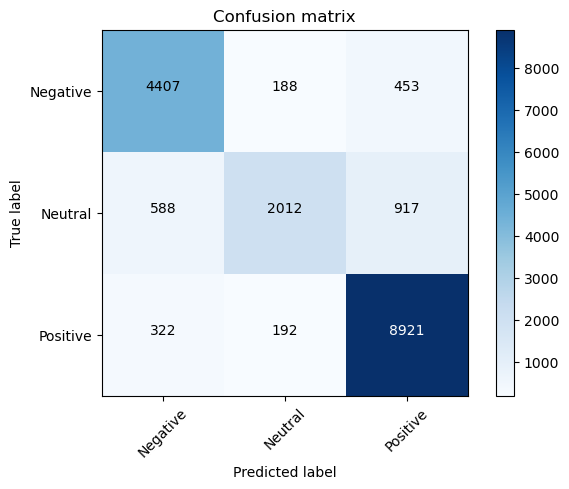

In [8]:
# Best combination of model and vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
x_train_trasformed = vectorizer.fit_transform(x_train)
x_test_trasformed = vectorizer.transform(x_test)

class_names = classification.Sentiment.get_all()
model = SVC()
model.fit(x_train_trasformed, y_train)
y_pred = model.predict(x_test_trasformed)
classification.show_results(y_test, y_pred, class_names)

In [9]:
# dump.save_model(model, "our_model")
# dump.save_vectorizer(vectorizer, "our_vectorizer")